In [130]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [150]:
def calculate_error(actual, predicted, predicted_time):
    actual_index = 0;
    predicted_values = []
    for i in range(len(predicted)):
        if i == 0:
            continue
        if actual_index == len(actual):
            break
        if predicted[i] > actual[actual_index]: 
            slope = (predicted[i] - predicted[i-1]) / (predicted_time[i] - predicted_time[i-1])
            intercept = predicted[i] - slope * predicted_time[i]
            predicted_value = np.polyval([slope, intercept], actual[actual_index])
            predicted_values.append(predicted_value)
            actual_index += 1
    for i in range(actual_index, len(actual)):
        predicted_values.append(actual[actual_index])
        actual_index += 1
    
    r2 = r2_score(actual, predicted_values)
    return r2

def calulate_curve(k, n):
    # Define the differential equation function
    def differential_equation(v, t, k, n):
        dvdt = 9.8 - k * v**n
        return dvdt

    # Define the initial condition and time points
    v0 = 0  # Initial condition
    t = np.linspace(0, 1.5, 100)  # Time points

    # Define constants

    # Solve the differential equation
    v = odeint(differential_equation, v0, t, args=(k, n))

    x0 = 0
    v = v.ravel()
    x = cumtrapz(v, t, initial=x0)

    # Plot the integral of x
    # plt.plot(t, x)
    # plt.plot(t_data, x_data, 'o')
    # plt.xlabel('Time (t)')
    # plt.ylabel('Position')
    # plt.title('Position vs Time')
    # plt.grid()
    # plt.show()
    return x, t

2.0 0.0 -2.9260343161512963
2.0 0.1 -2.4599987112319894
2.0 0.2 -2.0682412299224255
2.0 0.30000000000000004 -1.7352649521726016
2.0 0.4 -1.4495537755374968
2.0 0.5 -1.2023761785854905
2.0 0.6000000000000001 -0.9869936327174771
2.0 0.7000000000000001 -0.7981265297264668
2.0 0.8 -0.6315800665612268
2.0 0.9 -0.4839824121943881
2.0 1.0 -0.35259238948752847
2.0 1.1 -0.23516072780999053
2.0 1.2000000000000002 -0.12982487080608074
2.0 1.3 -0.035030238637440814
2.0 1.4000000000000001 0.050530362750833224
2.0 1.5 0.12796348454821616
2.0 1.6 0.19821166247848232
2.0 1.7000000000000002 0.26208236619531844
2.0 1.8 0.3202709765873333
2.0 1.9000000000000001 0.37337938562609463
2.0 2.0 0.42193091932258076
2.0 2.1 0.46638255952717056
2.0 2.2 0.5071349598423194
2.0 2.3000000000000003 0.5445407188240128
2.0 2.4000000000000004 0.5789112391142295
2.0 2.5 0.6105224613605131
2.0 2.6 0.6396196731751846
2.0 2.7 0.6664215624368404
2.0 2.8000000000000003 0.6911236498161949
2.0 2.9000000000000004 0.71390120877572

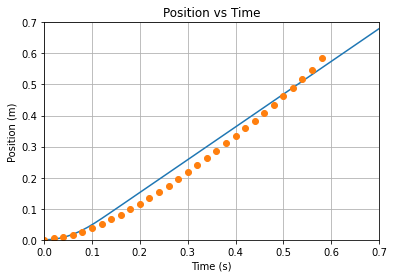

In [156]:
data = pd.read_csv('data.csv')
t_data = data["Time (s)"]
x_data = data["Position (m)"]
t_data = t_data - t_data[0]
x_data = x_data - x_data[0]

max = -100000000
best_k = 0
best_n = 0
for n in np.arange(2, 10, 0.1):
    for k in np.arange(0, 10, 0.1):
        x, t = calulate_curve(k, n)
        r2 = calculate_error(x_data, x, t)
        if r2 > max:
            max = r2
            best_k = k
            best_n = n
        print(n, k, r2)

print("Best(k, n, r2): ", best_k, best_n, max)
x, t = calulate_curve(min_k, min_n)
plt.plot(t, x)
plt.plot(t_data, x_data, 'o')
plt.xlim(0, 0.7)
plt.ylim(0, 0.7)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time')
plt.grid()
plt.show()


9.400000000000007 1.7000000000000002 0.9629840718443964
9.400000000000007 1.7100000000000002 0.9630612223500068
9.400000000000007 1.7200000000000002 0.9631364489588204
9.400000000000007 1.7300000000000002 0.9632097833907193
9.400000000000007 1.7400000000000002 0.9632812576275362
9.400000000000007 1.7500000000000002 0.9633509026671783
9.400000000000007 1.7600000000000002 0.9634187488587893
9.400000000000007 1.7700000000000002 0.9634848259207162
9.400000000000007 1.7800000000000002 0.9635491629554995
9.400000000000007 1.7900000000000003 0.963611788466797
9.400000000000007 1.8000000000000003 0.9636727303742452
9.400000000000007 1.8100000000000003 0.963732016028162
9.400000000000007 1.8200000000000003 0.9637896722243815
9.400000000000007 1.8300000000000003 0.9638457252179705
9.400000000000007 1.8400000000000003 0.963900200735822
9.400000000000007 1.8500000000000003 0.9639531239880628
9.400000000000007 1.8600000000000003 0.9640045196907434
9.400000000000007 1.8700000000000003 0.964054411975

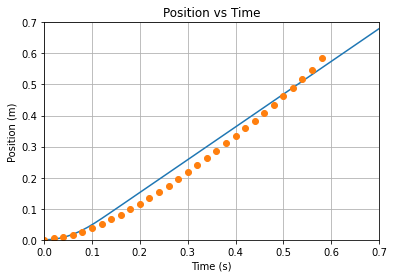

In [157]:
for n in np.arange(best_n-0.5, best_n+0.5, 0.01):
    for k in np.arange(best_k-0.5, best_k+0.5, 0.01):
        x, t = calulate_curve(k, n)
        r2 = calculate_error(x_data, x, t)
        if r2 > max:
            max = r2
            best_k = k
            best_n = n
        print(n, k, r2)

print("Best(k, n, r2): ", best_k, best_n, max)
x, t = calulate_curve(min_k, min_n)
plt.plot(t, x)
plt.plot(t_data, x_data, 'o')
plt.xlim(0, 0.7)
plt.ylim(0, 0.7)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs Time')
plt.grid()
plt.show()